# TensorDiagrams - Minimal Working Example

This notebook demonstrates the basic usage of the TensorDiagrams package.
We will:
1. Load the configuration
2. Define some tensor nodes
3. Create diagrams
4. Use diagram completion to generate all valid label configurations
5. Apply transformations (reflection, rotation)
6. Generate contraction code

## 1. Setup

In [ ]:
using TensorDiagrams

In [2]:
load_config("config.yml");

## 2. Define Tensor Nodes

We define some tensor nodes from the 2x1 model. Nodes can have:
- `name`: identifier
- `legs`: dict mapping sides to leg indices
- `allowed_labels`: valid space labels per leg
- `color`: plotting color
- `width`/`height`: explicit dimensions for plotting

Nodes consistency: true


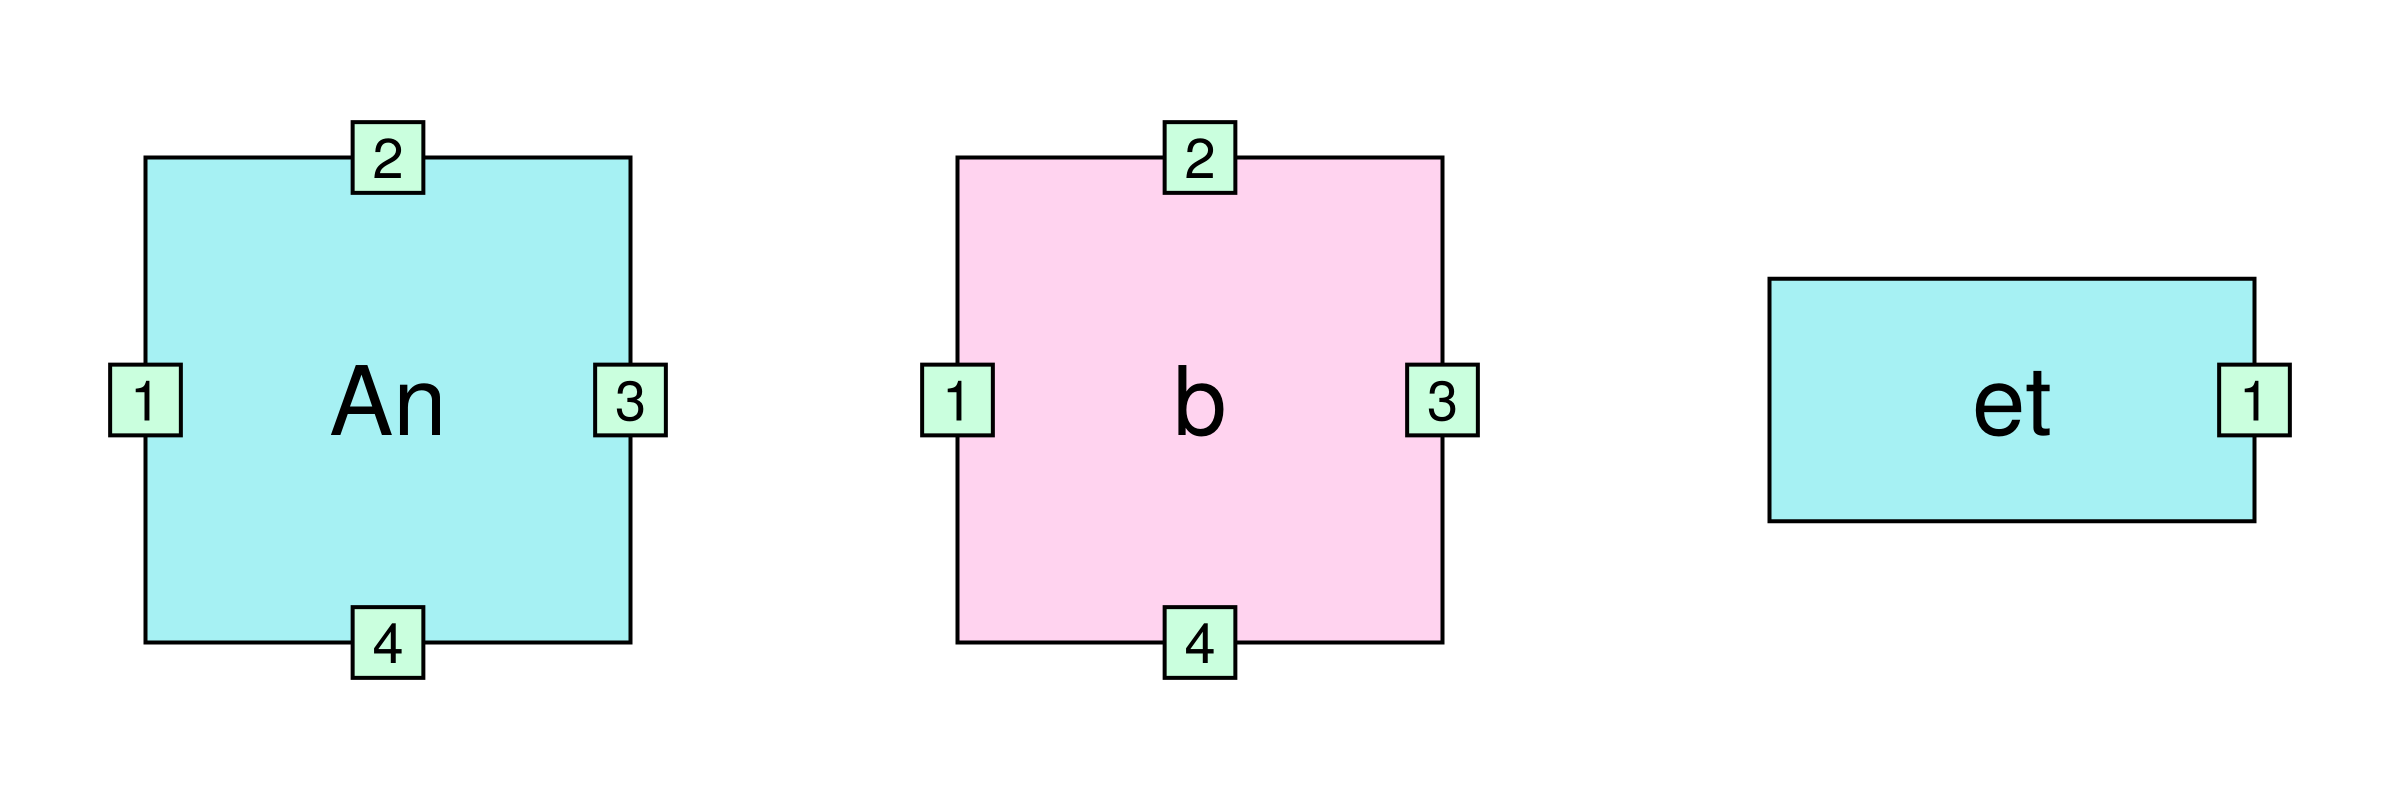

In [3]:
# Finite dimensional tensor An (4 legs, all in z space)
An_nd = TensorNode(
    name="An",
    color=BLUE,
    legs=Dict("left" => [1], "top" => [2], "right" => [3], "bottom" => [4]),
    allowed_labels=[["z"], ["z"], ["z"], ["z"]],
    width=1.2,
    height=1.2
)

# Infinite dimensional tensor b (4 legs, mixed spaces)
b_nd = TensorNode(
    name="b",
    color=PINK,
    legs=Dict("left" => [1], "top" => [2], "right" => [3], "bottom" => [4]),
    allowed_labels=[["z", "u", "d", "r"], ["z", "x"], ["z", "u", "d", "r"], ["z", "x"]],
    forbidden_label_combinations=[["z", "z", "z", "z"]],
    width=1.2,
    height=1.2
)

# Auxiliary tensor et (1 leg)
et_nd = TensorNode(
    name="et",
    color=BLUE,
    legs=Dict("right" => [1]),
    allowed_labels=[["t"]],
    width=1.2,
    height=0.6
)

# Check node consistency
all_nodes = [An_nd, b_nd, et_nd]
nodes_consistency = check_node_consistency.(all_nodes) .|> x -> all(values(x))
println("Nodes consistency: ", all(nodes_consistency))
# Plot all defined nodes
plot_tensor_node_list(all_nodes; cols=3, size=(1200, 400))

## 3. Create Diagrams

A `TensorDiagram` consists of:
- `nodes`: list of TensorNode objects
- `contraction_pattern`: ncon-style connectivity (positive=internal, negative=boundary)
- `boundary_slots_num`: number of slots per boundary side
- `boundary_legs`: which pattern indices end on which boundary
- `boundary_legs_posidx`: position of each boundary leg within its side
- `labels`: optional space labels for legs
- `node_coordinates`: optional explicit positions for nodes

In [4]:
# Simple diagram: An connected to b with two auxiliary tensors
# Pattern: An and b share internal leg 1
# Boundary legs: -1 to -8

An_flp1_nd = flip(An_nd, 1) # Flip An's first leg to be able to contract it with b. This is unnecessary, but it allows to ensure that if we generate code for this diagram it will work with TensorKit

diagram1 = TensorDiagram(
    nodes=[reflect(An_flp1_nd; dir="horizontal"), b_nd, reflect(et_nd; dir="horizontal"), et_nd],
    contraction_pattern=[[1, -3, -2, -7], [1, -4, -6, -8], [-1], [-5]],
    boundary_slots_num=Dict(
        "left" => 6,
        "right" => 6,
        "top" => 3,
        "bottom" => 3
    ),
    boundary_legs=Dict(
        "left" => [-1, -2],
        "top" => [-3, -4],
        "right" => [-5, -6],
        "bottom" => [-7, -8]
    ),
    boundary_legs_posidx=Dict(
        "left" => [1, 4],
        "top" => [1, 3],
        "right" => [1, 4],
        "bottom" => [1, 3]
    ),
    labels=Dict(-6 => "z"),
    node_coordinates=[
        [-2.0, 0.0],
        [2.0, 0.0],
        [-3.0, -3.0],
        [3.0, -3.0]
    ],
    factor="1.0"
)

# Check consistency
consistency = check_diagram_consistency(diagram1)
println("Diagram 1 consistent: ", all(values(consistency)))

# Create a variant by copying and modifying the label
diagram2 = copy(diagram1)
diagram2.labels[-6] = "r"  # Change label to infinite space "r"

# Check consistency
consistency = check_diagram_consistency(diagram2)
println("Diagram 2 consistent: ", all(values(consistency)))

# Plot both diagrams side by side with descriptions
diagrams = [diagram1, diagram2]
display_scrollable_figures(
    [plot_tensor_diagram(d; scale=1.0) for d in diagrams],
    [pretty_format(d; pad_to=48) for d in diagrams];
    max_height="800px"
)

Diagram 1 consistent: true
Diagram 2 consistent: true


<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
<path d="M 8.203125 -3.515625 C 8.203125 -1.296875 6.65625 0.234375 4.5 0.234375 C 1.90625 0.234375 0.6875 -1.625 0.6875 -5.171875 C 0.6875 -9.125 2.109375 -11.34375 4.75 -11.34375 C 6.484375 -11.34375 7.703125 -10.234375 7.96875 -8.390625 C 7.96875 -8.390625 6.5625 -8.390625 6.5625 -8.390625 C 6.34375 -9.46875 5.640625 -10.09375 4.65625 -10.09375 C 3.046875 -10.09375 2.140625 -8.5625 2.125 -5.796875 C 2.734375 -6.625 3.609375 -7.0625 4.734375 -7.0625 C 6.765625 -7.0625 8.203125 -5.625 8.203125 -3.515625 Z M 6.765625 -3.40625 C 6.765625 -4.921875 5.921875 -5.8125 4.5625 -5.8125 C 3.171875 -5.8125 2.203125 -4.890625 2.203125 -3.484375 C 2.203125 -2.03125 3.203125 -1.015625 4.515625 -1.015625 C 5.8125 -1.015625 6.765625 -1.984375 6.765625 -3.40625 Z M 6.765625 -3.40625 "/>
 
 
 
 
 
 
 
 
<path d="M 8.09375 -3.296875 C 8.09375 -1.15625 6.59375 0.234375 4.25 0.234375 C 1.9375 0.234375 0.6875 -0.890625 0.515625 -3.421875 C 0.515625 -3.421875 1.921875 -3.421875 1.921875 -3.421875 C 2.015625 -1.78125 2.765625 -1.015625 4.296875 -1.015625 C 5.78125 -1.015625 6.65625 -1.859375 6.65625 -3.28125 C 6.65625 -4.546875 5.859375 -5.28125 4.296875 -5.28125 C 4.296875 -5.28125 3.53125 -5.28125 3.53125 -5.28125 C 3.53125 -5.28125 3.53125 -6.46875 3.53125 -6.46875 C 5.796875 -6.46875 6.3125 -6.953125 6.3125 -8.171875 C 6.3125 -9.375 5.5625 -10.109375 4.3125 -10.109375 C 2.875 -10.109375 2.1875 -9.359375 2.15625 -7.6875 C 2.15625 -7.6875 0.75 -7.6875 0.75 -7.6875 C 0.796875 -10.09375 2.015625 -11.34375 4.296875 -11.34375 C 6.46875 -11.34375 7.765625 -10.171875 7.765625 -8.21875 C 7.765625 -7.09375 7.234375 -6.359375 6.171875 -5.9375 C 7.53125 -5.46875 8.09375 -4.671875 8.09375 -3.296875 Z M 8.09375 -3.296875 "/>
 
 
 
 
 
<path d="M 8.171875 -8.015625 C 8.171875 -6.625 7.359375 -5.4375 5.78125 -4.59375 C 5.78125 -4.59375 4.171875 -3.734375 4.171875 -3.734375 C 2.78125 -2.90625 2.265625 -2.3125 2.125 -1.390625 C 2.125 -1.390625 8.09375 -1.390625 8.09375 -1.390625 C 8.09375 -1.390625 8.09375 0 8.09375 0 C 8.09375 0 0.546875 0 0.546875 0 C 0.671875 -2.5 1.359375 -3.5625 3.734375 -4.90625 C 3.734375 -4.90625 5.203125 -5.75 5.203125 -5.75 C 6.203125 -6.3125 6.734375 -7.09375 6.734375 -7.984375 C 6.734375 -9.203125 5.78125 -10.109375 4.5 -10.109375 C 3.109375 -10.109375 2.3125 -9.3125 2.203125 -7.40625 C 2.203125 -7.40625 0.796875 -7.40625 0.796875 -7.40625 C 0.875 -10.15625 2.21875 -11.34375 4.546875 -11.34375 C 6.6875 -11.34375 8.171875 -9.9375 8.171875 -8.015625 Z M 8.171875 -8.015625 "/>
 
 
<path d="M 8.3125 -2.71875 C 8.3125 -2.71875 6.640625 -2.71875 6.640625 -2.71875 C 6.640625 -2.71875 6.640625 0 6.640625 0 C 6.640625 0 5.234375 0 5.234375 0 C 5.234375 0 5.234375 -2.71875 5.234375 -2.71875 C 5.234375 -2.71875 0.453125 -2.71875 0.453125 -2.71875 C 0.453125 -2.71875 0.453125 -4.203125 0.453125 -4.203125 C 0.453125 -4.203125 5.59375 -11.34375 5.59375 -11.34375 C 5.59375 -11.34375 6.640625 -11.34375 6.640625 -11.34375 C 6.640625 -11.34375 6.640625 -3.984375 6.640625 -3.984375 C 6.640625 -3.984375 8.3125 -3.984375 8.3125 -3.984375 C 8.3125 -3.984375 8.3125 -2.71875 8.3125 -2.71875 Z M 5.234375 -3.984375 C 5.234375 -3.984375 5.234375 -8.9375 5.234375 -8.9375 C 5.234375 -8.9375 1.6875 -3.984375 1.6875 -3.984375 C 1.6875 -3.984375 5.234375 -3.984375 5.234375 -3.984375 Z M 5.234375 -3.984375 "/>
 
 
 
 
 
<path d="M 12.546875 -6.4375 C 12.546875 -2.359375 10.390625 0.359375 7.078125 0.359375 C 5.328125 0.359375 4.0625 -0.34375 3.09375 -1.796875 C 3.09375 -1.796875 3.09375 0 3.09375 0 C 3.09375 0 1.296875 0 1.296875 0 C 1.296875 0 1.296875 -17.5 1.296875 -17.5 C 1.296875 -17.5 3.28125 -17.5 3.28125 -17.5 C 3.28125 -17.5 3.28125 -10.875 3.28125 -10.875 C 4.21875 -12.28125 5.453125 -12.9375 7.171875 -12.9375 C 10.484375 -12.9375 12.546875 -10.515625 12.546875 -6.4375 Z M 10.46875 -6.3125 C 10.46875 -9.125 9.03125 -11.0625 6.796875 -11.0625 C 4.6875 -11.15625 3.28125 -9.234375 3.28125 -6.28125 C 3.28125 

## 4. Diagram Completion

The `fill_labels` function takes a diagram with incomplete labels (marked as `"?"` or simply missing) and generates all valid complete diagrams by filling in labels according to each node's `allowed_labels`, while respecting `forbidden_label_combinations`.

Below we complete the diagrams defined above and display them in a scrollable grid: the first column shows the original (partially labeled) diagrams, and subsequent columns show all valid completions.

In [5]:
# Complete all diagrams defined above
diagrams_filled = fill_labels.(diagrams)

# Build columns: first column = original diagrams, subsequent columns = completions
columns_num = maximum(length.(diagrams_filled)) + 1
columns = Any[[plot_tensor_diagram(d; scale=1.0) for d in diagrams]]

for c in 1:(columns_num-1)
    column = Any[]
    for dlist in diagrams_filled
        if length(dlist) >= c
            push!(column, plot_tensor_diagram(dlist[c]; scale=1.0))
        else
            push!(column, missing)
        end
    end
    push!(columns, column)
end

# Check consistency of all completed diagrams
diagrams_filled_flat = vcat(diagrams_filled...)
diagrams_consistency = all.(values.(check_diagram_consistency.(diagrams_filled_flat)))
if !all(diagrams_consistency)
    inconsistent_indices = findall(!, diagrams_consistency)
    @warn "Completed diagrams $(inconsistent_indices) are inconsistent!"
end

# Display: first column = originals, subsequent columns = completions
display_scrollable_figures(columns...; max_height="800px")

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
<path d="M 8.203125 -3.515625 C 8.203125 -1.296875 6.65625 0.234375 4.5 0.234375 C 1.90625 0.234375 0.6875 -1.625 0.6875 -5.171875 C 0.6875 -9.125 2.109375 -11.34375 4.75 -11.34375 C 6.484375 -11.34375 7.703125 -10.234375 7.96875 -8.390625 C 7.96875 -8.390625 6.5625 -8.390625 6.5625 -8.390625 C 6.34375 -9.46875 5.640625 -10.09375 4.65625 -10.09375 C 3.046875 -10.09375 2.140625 -8.5625 2.125 -5.796875 C 2.734375 -6.625 3.609375 -7.0625 4.734375 -7.0625 C 6.765625 -7.0625 8.203125 -5.625 8.203125 -3.515625 Z M 6.765625 -3.40625 C 6.765625 -4.921875 5.921875 -5.8125 4.5625 -5.8125 C 3.171875 -5.8125 2.203125 -4.890625 2.203125 -3.484375 C 2.203125 -2.03125 3.203125 -1.015625 4.515625 -1.015625 C 5.8125 -1.015625 6.765625 -1.984375 6.765625 -3.40625 Z M 6.765625 -3.40625 "/>
 
 
 
 
 
 
 
 
<path d="M 8.09375 -3.296875 C 8.09375 -1.15625 6.59375 0.234375 4.25 0.234375 C 1.9375 0.234375 0.6875 -0.890625 0.515625 -3.421875 C 0.515625 -3.421875 1.921875 -3.421875 1.921875 -3.421875 C 2.015625 -1.78125 2.765625 -1.015625 4.296875 -1.015625 C 5.78125 -1.015625 6.65625 -1.859375 6.65625 -3.28125 C 6.65625 -4.546875 5.859375 -5.28125 4.296875 -5.28125 C 4.296875 -5.28125 3.53125 -5.28125 3.53125 -5.28125 C 3.53125 -5.28125 3.53125 -6.46875 3.53125 -6.46875 C 5.796875 -6.46875 6.3125 -6.953125 6.3125 -8.171875 C 6.3125 -9.375 5.5625 -10.109375 4.3125 -10.109375 C 2.875 -10.109375 2.1875 -9.359375 2.15625 -7.6875 C 2.15625 -7.6875 0.75 -7.6875 0.75 -7.6875 C 0.796875 -10.09375 2.015625 -11.34375 4.296875 -11.34375 C 6.46875 -11.34375 7.765625 -10.171875 7.765625 -8.21875 C 7.765625 -7.09375 7.234375 -6.359375 6.171875 -5.9375 C 7.53125 -5.46875 8.09375 -4.671875 8.09375 -3.296875 Z M 8.09375 -3.296875 "/>
 
 
 
 
 
<path d="M 8.171875 -8.015625 C 8.171875 -6.625 7.359375 -5.4375 5.78125 -4.59375 C 5.78125 -4.59375 4.171875 -3.734375 4.171875 -3.734375 C 2.78125 -2.90625 2.265625 -2.3125 2.125 -1.390625 C 2.125 -1.390625 8.09375 -1.390625 8.09375 -1.390625 C 8.09375 -1.390625 8.09375 0 8.09375 0 C 8.09375 0 0.546875 0 0.546875 0 C 0.671875 -2.5 1.359375 -3.5625 3.734375 -4.90625 C 3.734375 -4.90625 5.203125 -5.75 5.203125 -5.75 C 6.203125 -6.3125 6.734375 -7.09375 6.734375 -7.984375 C 6.734375 -9.203125 5.78125 -10.109375 4.5 -10.109375 C 3.109375 -10.109375 2.3125 -9.3125 2.203125 -7.40625 C 2.203125 -7.40625 0.796875 -7.40625 0.796875 -7.40625 C 0.875 -10.15625 2.21875 -11.34375 4.546875 -11.34375 C 6.6875 -11.34375 8.171875 -9.9375 8.171875 -8.015625 Z M 8.171875 -8.015625 "/>
 
 
<path d="M 8.3125 -2.71875 C 8.3125 -2.71875 6.640625 -2.71875 6.640625 -2.71875 C 6.640625 -2.71875 6.640625 0 6.640625 0 C 6.640625 0 5.234375 0 5.234375 0 C 5.234375 0 5.234375 -2.71875 5.234375 -2.71875 C 5.234375 -2.71875 0.453125 -2.71875 0.453125 -2.71875 C 0.453125 -2.71875 0.453125 -4.203125 0.453125 -4.203125 C 0.453125 -4.203125 5.59375 -11.34375 5.59375 -11.34375 C 5.59375 -11.34375 6.640625 -11.34375 6.640625 -11.34375 C 6.640625 -11.34375 6.640625 -3.984375 6.640625 -3.984375 C 6.640625 -3.984375 8.3125 -3.984375 8.3125 -3.984375 C 8.3125 -3.984375 8.3125 -2.71875 8.3125 -2.71875 Z M 5.234375 -3.984375 C 5.234375 -3.984375 5.234375 -8.9375 5.234375 -8.9375 C 5.234375 -8.9375 1.6875 -3.984375 1.6875 -3.984375 C 1.6875 -3.984375 5.234375 -3.984375 5.234375 -3.984375 Z M 5.234375 -3.984375 "/>
 
 
 
 
 
<path d="M 12.546875 -6.4375 C 12.546875 -2.359375 10.390625 0.359375 7.078125 0.359375 C 5.328125 0.359375 4.0625 -0.34375 3.09375 -1.796875 C 3.09375 -1.796875 3.09375 0 3.09375 0 C 3.09375 0 1.296875 0 1.296875 0 C 1.296875 0 1.296875 -17.5 1.296875 -17.5 C 1.296875 -17.5 3.28125 -17.5 3.28125 -17.5 C 3.28125 -17.5 3.28125 -10.875 3.28125 -10.875 C 4.21875 -12.28125 5.453125 -12.9375 7.171875 -12.9375 C 10.484375 -12.9375 12.546875 -10.515625 12.546875 -6.4375 Z M 10.46875 -6.3125 C 10.46875 -9.125 9.03125 -11.0625 6.796875 -11.0625 C 4.6875 -11.15625 3.28125 -9.234375 3.28125 -6.28125 C 3.28125 

## 5. Diagram Transformations

Diagrams can be transformed using reflection and rotation. These operations update all components (nodes, coordinates, boundary mappings) consistently.

Below we apply vertical reflection and 90° counter-clockwise rotation to `diagram1` and display the results side by side.

In [9]:
# Apply transformations
diagram1_reflected = reflect(diagram1; dir="vertical")
diagram1_rotated = rotate(diagram1, 1)

# Display: column 1 = original repeated, column 2 = transformed versions, column 3 = labels
transform_diagrams = [diagram1_reflected, diagram1_rotated]
transform_labels = ["Vertically Reflected", "Rotated 90° CCW"]
padded_labels = ["\n"^20 * lbl * "\n"^10 for lbl in transform_labels]

display_scrollable_figures(
    [plot_tensor_diagram(diagram1; scale=1.0) for _ in 1:2],  # Original repeated
    [plot_tensor_diagram(d; scale=1.0) for d in transform_diagrams],  # Transformed
    padded_labels;
    max_height="800px"
)

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
<path d="M 8.203125 -3.515625 C 8.203125 -1.296875 6.65625 0.234375 4.5 0.234375 C 1.90625 0.234375 0.6875 -1.625 0.6875 -5.171875 C 0.6875 -9.125 2.109375 -11.34375 4.75 -11.34375 C 6.484375 -11.34375 7.703125 -10.234375 7.96875 -8.390625 C 7.96875 -8.390625 6.5625 -8.390625 6.5625 -8.390625 C 6.34375 -9.46875 5.640625 -10.09375 4.65625 -10.09375 C 3.046875 -10.09375 2.140625 -8.5625 2.125 -5.796875 C 2.734375 -6.625 3.609375 -7.0625 4.734375 -7.0625 C 6.765625 -7.0625 8.203125 -5.625 8.203125 -3.515625 Z M 6.765625 -3.40625 C 6.765625 -4.921875 5.921875 -5.8125 4.5625 -5.8125 C 3.171875 -5.8125 2.203125 -4.890625 2.203125 -3.484375 C 2.203125 -2.03125 3.203125 -1.015625 4.515625 -1.015625 C 5.8125 -1.015625 6.765625 -1.984375 6.765625 -3.40625 Z M 6.765625 -3.40625 "/>
 
 
 
 
 
 
 
 
<path d="M 8.09375 -3.296875 C 8.09375 -1.15625 6.59375 0.234375 4.25 0.234375 C 1.9375 0.234375 0.6875 -0.890625 0.515625 -3.421875 C 0.515625 -3.421875 1.921875 -3.421875 1.921875 -3.421875 C 2.015625 -1.78125 2.765625 -1.015625 4.296875 -1.015625 C 5.78125 -1.015625 6.65625 -1.859375 6.65625 -3.28125 C 6.65625 -4.546875 5.859375 -5.28125 4.296875 -5.28125 C 4.296875 -5.28125 3.53125 -5.28125 3.53125 -5.28125 C 3.53125 -5.28125 3.53125 -6.46875 3.53125 -6.46875 C 5.796875 -6.46875 6.3125 -6.953125 6.3125 -8.171875 C 6.3125 -9.375 5.5625 -10.109375 4.3125 -10.109375 C 2.875 -10.109375 2.1875 -9.359375 2.15625 -7.6875 C 2.15625 -7.6875 0.75 -7.6875 0.75 -7.6875 C 0.796875 -10.09375 2.015625 -11.34375 4.296875 -11.34375 C 6.46875 -11.34375 7.765625 -10.171875 7.765625 -8.21875 C 7.765625 -7.09375 7.234375 -6.359375 6.171875 -5.9375 C 7.53125 -5.46875 8.09375 -4.671875 8.09375 -3.296875 Z M 8.09375 -3.296875 "/>
 
 
 
 
 
<path d="M 8.171875 -8.015625 C 8.171875 -6.625 7.359375 -5.4375 5.78125 -4.59375 C 5.78125 -4.59375 4.171875 -3.734375 4.171875 -3.734375 C 2.78125 -2.90625 2.265625 -2.3125 2.125 -1.390625 C 2.125 -1.390625 8.09375 -1.390625 8.09375 -1.390625 C 8.09375 -1.390625 8.09375 0 8.09375 0 C 8.09375 0 0.546875 0 0.546875 0 C 0.671875 -2.5 1.359375 -3.5625 3.734375 -4.90625 C 3.734375 -4.90625 5.203125 -5.75 5.203125 -5.75 C 6.203125 -6.3125 6.734375 -7.09375 6.734375 -7.984375 C 6.734375 -9.203125 5.78125 -10.109375 4.5 -10.109375 C 3.109375 -10.109375 2.3125 -9.3125 2.203125 -7.40625 C 2.203125 -7.40625 0.796875 -7.40625 0.796875 -7.40625 C 0.875 -10.15625 2.21875 -11.34375 4.546875 -11.34375 C 6.6875 -11.34375 8.171875 -9.9375 8.171875 -8.015625 Z M 8.171875 -8.015625 "/>
 
 
<path d="M 8.3125 -2.71875 C 8.3125 -2.71875 6.640625 -2.71875 6.640625 -2.71875 C 6.640625 -2.71875 6.640625 0 6.640625 0 C 6.640625 0 5.234375 0 5.234375 0 C 5.234375 0 5.234375 -2.71875 5.234375 -2.71875 C 5.234375 -2.71875 0.453125 -2.71875 0.453125 -2.71875 C 0.453125 -2.71875 0.453125 -4.203125 0.453125 -4.203125 C 0.453125 -4.203125 5.59375 -11.34375 5.59375 -11.34375 C 5.59375 -11.34375 6.640625 -11.34375 6.640625 -11.34375 C 6.640625 -11.34375 6.640625 -3.984375 6.640625 -3.984375 C 6.640625 -3.984375 8.3125 -3.984375 8.3125 -3.984375 C 8.3125 -3.984375 8.3125 -2.71875 8.3125 -2.71875 Z M 5.234375 -3.984375 C 5.234375 -3.984375 5.234375 -8.9375 5.234375 -8.9375 C 5.234375 -8.9375 1.6875 -3.984375 1.6875 -3.984375 C 1.6875 -3.984375 5.234375 -3.984375 5.234375 -3.984375 Z M 5.234375 -3.984375 "/>
 
 
 
 
 
<path d="M 12.546875 -6.4375 C 12.546875 -2.359375 10.390625 0.359375 7.078125 0.359375 C 5.328125 0.359375 4.0625 -0.34375 3.09375 -1.796875 C 3.09375 -1.796875 3.09375 0 3.09375 0 C 3.09375 0 1.296875 0 1.296875 0 C 1.296875 0 1.296875 -17.5 1.296875 -17.5 C 1.296875 -17.5 3.28125 -17.5 3.28125 -17.5 C 3.28125 -17.5 3.28125 -10.875 3.28125 -10.875 C 4.21875 -12.28125 5.453125 -12.9375 7.171875 -12.9375 C 10.484375 -12.9375 12.546875 -10.515625 12.546875 -6.4375 Z M 10.46875 -6.3125 C 10.46875 -9.125 9.03125 -11.0625 6.796875 -11.0625 C 4.6875 -11.15625 3.28125 -9.234375 3.28125 -6.28125 C 3.28125 

## 6. Code Generation

The `diagram_to_code` function generates Julia code that performs the tensor contractions specified by the diagram. Note that the label information is ignored by this function.

Below we generate the contraction code for `diagram1`. 

In [7]:
# Generate contraction code for the diagram
code = diagram_to_code(diagram1; result_name="result")
println(code)

@tensoropt result[-1, -2, -3, -4, -5, -6, -7, -8]:=An_flp_1[1, -3, -2, -7] * b[1, -4, -6, -8] * et[-1] * et[-5]*(1.0)
